<a href="https://colab.research.google.com/github/Therezaclm/Estatistica-com-python/blob/main/Correla%C3%A7%C3%A3o_e_regress%C3%A3o_Womakerscode_TechMinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green>**BootCamp TECH MINAs 2023**</font>



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from scipy.stats import norm
import math

# <font color=green>Challenge Correlação e Regressão</font>

## <font color=blue>Desafio Análise de Correlação:</font>

Suponha que você trabalha em uma empresa do setor imobiliário. Para essa empresa é muito importante precificar corretamente o imóvel, caso contrário, os corretores podem perder a venda. Como parte do time de dados, você é responsável por analisar os principais fatores que podem afetar o preço dos imóveis. Para isso, eles te enviaram a base de dados (desafio_01_preco_imoveis.csv). Como você poderia ajudá-los?

Para responder esse desafio: A base de dados: desafio_01_preco_imoveis.csv contém as seguintes informações:

● **id** : código identificador do imóvel

● **date**: data em que o imóvel foi cadastrado

● **price**: preço do imóvel

● **bedrooms**: número de quartos

● **bathrooms:** número de banheiros

● **sqft_living**: tamanho do imóvel (dentro da casa)

● **sqft_lot**: tamanho do lote / terreno

● **floors**: andares

● **waterfront**: flag se o imóvel tem vista para o mar. 1 caso positivo, 0 caso
contrário.

● **view**: indica o número de quartos com vista.

● **condition**: condição do imóvel, escala de 1 a 5

● **grade**: nota do imóvel

● **sqft_above**: tamanho da casa acima do solo (excluindo porão)

● **sqft_basement**: tamanho do porão

● **yr_built**: ano em que a casa foi construída

● **yr_renovated**: ano em que a casa foi renovada

● **zipcode**: "CEP" do imóvel

● **lat**: latitude do imóvel

● **long**: longitude do imóvel


In [ ]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [ ]:
# lendo o dataset
dataset = pd.read_csv('/content/desafio_01_preco_imoveis.csv')

In [ ]:
# Verificando o tamanho do dataset
dataset.shape

(21613, 19)

In [ ]:
# imprimir as informações do dataset
dataset.info()
# o dataset possui um total de 19 colunas. 13 delas são do tipo "int64", enquanto 5 delas são do tipo "float64" e uma única do tipo "object",
# que é uma string representando a data em que o imóvel foi cadastrado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# mostrando as primeiras 5 linhas do dataset
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [ ]:
# verificando o resumo estatístico das variáveis numéricas
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [ ]:
# verificando a distribuição da variável categórica
dataset.describe(include=['O'])

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [ ]:
# verificando se há valores ausentes
dataset.isnull().sum()
# o dataset não possui valores ausentes

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

### **RESPONDENDO A PERGUNTA 1**

1 - Analise a correlação de todas as variáveis com o preço do imóvel. Quais variáveis são mais correlacionadas? Quais são menos correlacionadas?

In [ ]:
# calculando a matriz de correlação entre todas as colunas numéricas do dataset e atribuindo o resultado à variável dfcorrelacao
dfcorrelacao = dataset.corr()

In [ ]:
# criando um novo dataframe dada a matriz de correlação calculada anteriormente
dfcorrelacao =  pd.DataFrame(dfcorrelacao)

In [ ]:
# exibe as primeiras linhas 5 do dataFrame dfcorrelacao
dfcorrelacao.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223


**Variáveis mais correlacionadas?**

In [ ]:
# exibindo as 6 variáveis mais correlacionadas com a variável 'price' e ordenando o novo DataFrame pela coluna 'price' em ordem decrescente
correlacao_maior = dfcorrelacao.sort_values(by = 'price', ascending = False)
# exibindo os primeiros 6 resultados da coluna 'price'
correlacao_maior['price'].head(6)

price          1.000000
sqft_living    0.702035
grade          0.667434
sqft_above     0.605567
bathrooms      0.525138
view           0.397293
Name: price, dtype: float64

**Variáveis menos correlacionadas?**


In [ ]:
# exibindo as 6 variáveis menos correlacionadas com a variável 'price' e ordenando o novo DataFrame pela coluna 'price' em ordem decrescente
correlacao_menor = dfcorrelacao.sort_values(by = 'price', ascending = True)
# exibindo os primeiros 6 resultados da coluna 'price'
correlacao_menor['price'].head(6)

zipcode     -0.053203
id          -0.016762
long         0.021626
condition    0.036362
yr_built     0.054012
sqft_lot     0.089661
Name: price, dtype: float64

### **RESPONDENDO A PERGUNTA 2**

2 - Para as top 5 variáveis mais correlacionadas com o preço:

*2.1 plote as suas distribuições (histograma e boxplot)*

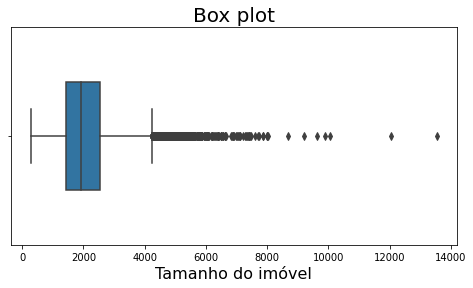

In [ ]:
# criamos um gráfico do tipo boxplot com a variável 'sqft_living' do dataset
# definimos a orientação horizontal e a largura das barras como 0.5
ax = sns.boxplot(data = dataset, x='sqft_living', orient = 'h', width = 0.5)
# definimos o tamanho da figura do gráfico como 8x4 polegadas
ax.figure.set_size_inches(8,4)
# adicionamos um título ao gráfico com tamanho de fonte de 20
ax.set_title('Box plot', fontsize = 20)
# adicionamos uma legenda ao eixo x do gráfico com tamanho de fonte de 16
ax.set_xlabel('Tamanho do imóvel', fontsize = 16)
# exibe o gráfico
_= ax

<ipython-input-15-2e7801413c67>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset['sqft_living'])


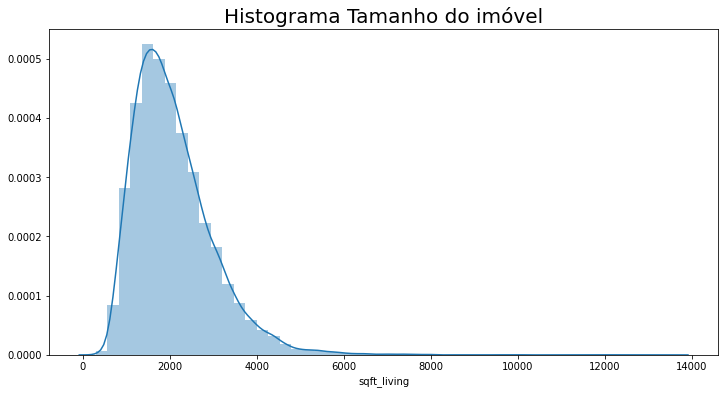

In [ ]:
# criamos um histograma da coluna 'sqft_living' do conjunto de dados 'dataset'
ax = sns.distplot(dataset['sqft_living'])
# definimos o tamanho da figura
ax.figure.set_size_inches(12, 6)
# definimos o título do gráfico e o tamanho da fonte
ax.set_title('Histograma Tamanho do imóvel', fontsize=20)
# definimos o rótulo do eixo y como vazio e o tamanho da fonte
ax.set_ylabel('', fontsize=16)
# exibe o gráfico
_= ax

<Axes: >

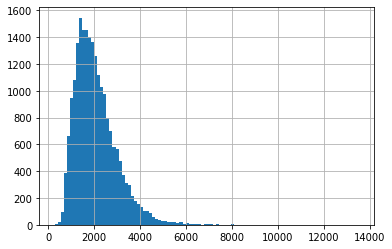

In [ ]:
dataset.sqft_living.hist(bins = 100)

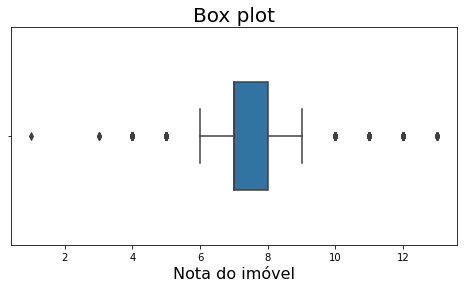

In [ ]:
ax = sns.boxplot(data = dataset, x='grade', orient = 'h', width = 0.5)
ax.figure.set_size_inches(8,4)
ax.set_title('Box plot', fontsize = 20)
ax.set_xlabel('Nota do imóvel', fontsize = 16)
_= ax

<ipython-input-18-b14eae52b963>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset['grade'])


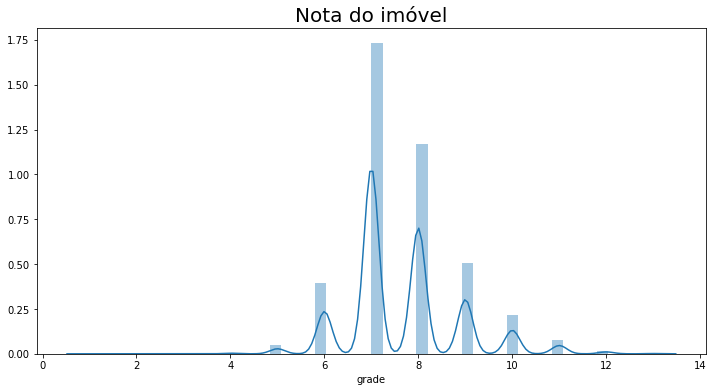

In [ ]:
ax = sns.distplot(dataset['grade'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Nota do imóvel', fontsize=20)
ax.set_ylabel('', fontsize=16)
_= ax

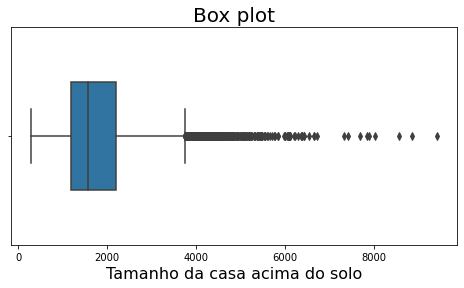

In [ ]:
ax = sns.boxplot(data = dataset, x='sqft_above', orient = 'h', width = 0.5)
ax.figure.set_size_inches(8,4)
ax.set_title('Box plot', fontsize = 20)
ax.set_xlabel('Tamanho da casa acima do solo', fontsize = 16)
_= ax

<Axes: >

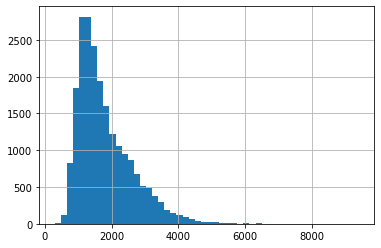

In [ ]:
dataset.sqft_above.hist(bins = 50)

<ipython-input-21-f6142bb06678>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset['sqft_above'])


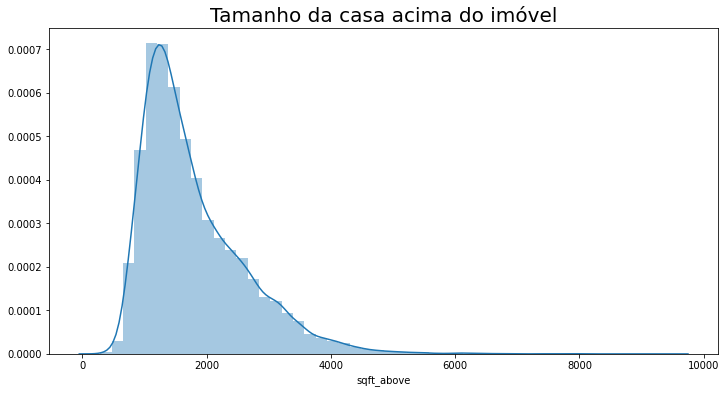

In [ ]:
ax = sns.distplot(dataset['sqft_above'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Tamanho da casa acima do imóvel', fontsize=20)
ax.set_ylabel('', fontsize=16)
_= ax

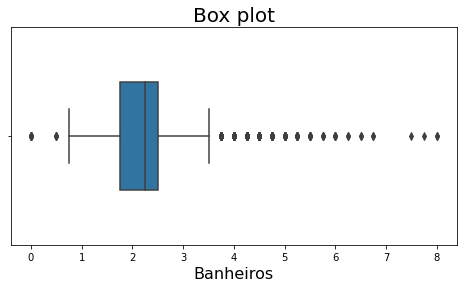

In [ ]:
ax = sns.boxplot(data = dataset, x='bathrooms', orient = 'h', width = 0.5)
ax.figure.set_size_inches(8,4)
ax.set_title('Box plot', fontsize = 20)
ax.set_xlabel('Banheiros', fontsize = 16)
_= ax

<Axes: >

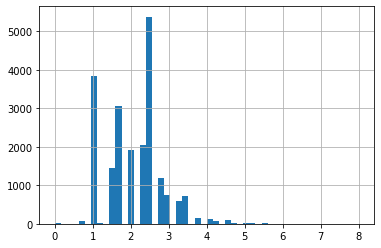

In [ ]:
dataset.bathrooms.hist(bins = 50)

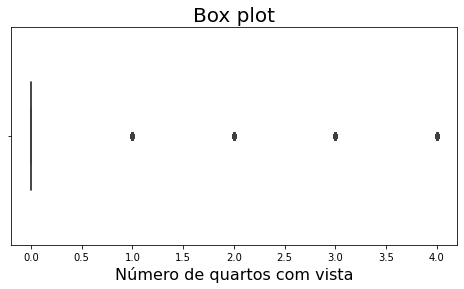

In [ ]:
ax = sns.boxplot(data = dataset, x='view', orient = 'h', width = 0.5)
ax.figure.set_size_inches(8,4)
ax.set_title('Box plot', fontsize = 20)
ax.set_xlabel('Número de quartos com vista', fontsize = 16)
_= ax

<Axes: >

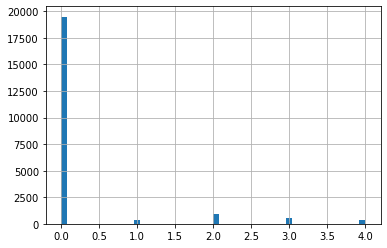

In [ ]:
dataset.view.hist(bins = 50)

*2.2 plote o scatterplot (gráfico de dispersão), contendo preço no eixo Y e a variável correlacionada no eixo X.*

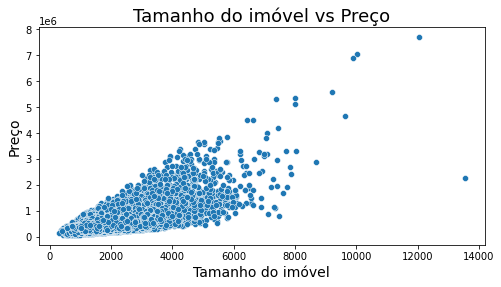

In [ ]:
ax = sns.scatterplot(x=dataset.sqft_living, y=dataset.price)
ax.figure.set_size_inches(8,4)
ax.set_title('Tamanho do imóvel vs Preço', fontsize=18)
ax.set_xlabel('Tamanho do imóvel', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
_= ax

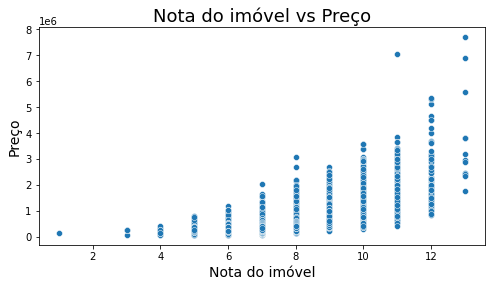

In [ ]:
ax = sns.scatterplot(x=dataset.grade, y=dataset.price)
ax.figure.set_size_inches(8,4)
ax.set_title('Nota do imóvel vs Preço', fontsize=18)
ax.set_xlabel('Nota do imóvel', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
_= ax

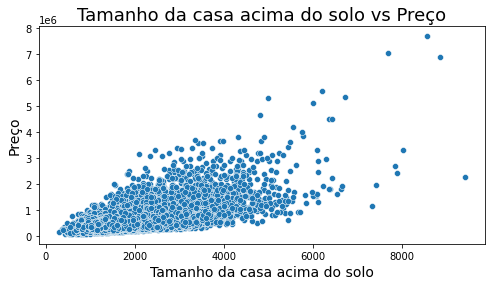

In [ ]:
ax = sns.scatterplot(x=dataset.sqft_above, y=dataset.price)
ax.figure.set_size_inches(8,4)
ax.set_title('Tamanho da casa acima do solo vs Preço', fontsize=18)
ax.set_xlabel('Tamanho da casa acima do solo', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
_= ax

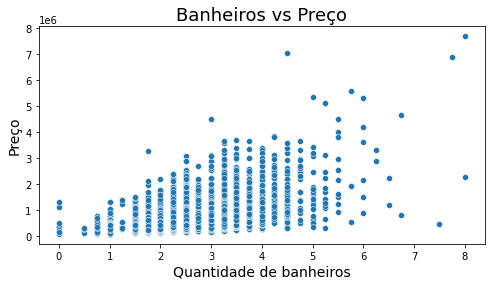

In [ ]:
ax = sns.scatterplot(x=dataset.bathrooms, y=dataset.price)
ax.figure.set_size_inches(8,4)
ax.set_title('Banheiros vs Preço', fontsize=18)
ax.set_xlabel('Quantidade de banheiros', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
_= ax

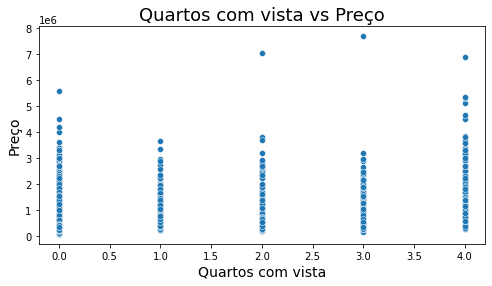

In [ ]:
ax = sns.scatterplot(x=dataset.view, y=dataset.price)
ax.figure.set_size_inches(8,4)
ax.set_title('Quartos com vista vs Preço', fontsize=18)
ax.set_xlabel('Quartos com vista', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
_= ax

*2.3 para cada uma das 5 variáveis faça uma regressão linear simples sendo preciso a variável resposta (y) e interprete os resultados.*

In [ ]:
# variável dependente (preço)
Y = dataset.price
# adiciona uma coluna de 1's na variável independente para incluir o intercepto
X = sm.add_constant(dataset.sqft_living)

In [ ]:
# cria o modelo de regressão
resultado_regressao = sm.OLS(Y, X).fit()

In [ ]:
# imprime o resumo do modelo
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:12:55   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      

Através da análise, foi calculado um coeficiente que nos diz quanto o preço do imóvel muda em relação à área da casa. Nesse caso, o coeficiente é de 280.6236, o que significa que, em média, o preço do imóvel aumenta em 280.62 dólares para cada aumento de 1 unidade na área da casa (em pés quadrados).

O valor de R-quadrado (R-squared) de 0,493 indica que cerca de 49,3% da variação no preço do imóvel é explicada pela área do imóvel.


In [ ]:
# criamos uma cópia do dataset original e atribuimos a uma nova variável chamada dataset2
dataset2 = dataset.copy()

In [ ]:
# criamos uma nova coluna que contém as previsões da regressão linear simples
dataset2['Y_previsto'] = resultado_regressao.predict()

In [ ]:
# selecionamos as colunas
dataset2[['price','sqft_living','Y_previsto']].round(2)

,price,sqft_living,Y_previsto
0,221900.0,1180,287555.07
1,538000.0,2570,677621.83
2,180000.0,770,172499.40
3,604000.0,1960,506441.45
4,510000.0,1680,427866.85
...,...,...,...
21608,360000.0,1530,385773.32
21609,400000.0,2310,604659.70
21610,402101.0,1020,242655.30
21611,400000.0,1600,405416.97


A partir dos resultados da regressão linear simples, podemos interpretar que a variável "sqft_living" (tamanho da casa) é um preditor significativo do preço das casas. Isso é indicado pelo valor do coeficiente de regressão estimado para a variável "sqft_living" ser positivo e significativo, o que sugere que o aumento no tamanho da casa leva a um aumento no preço da casa.

O valor do intercepto (constante) na equação da regressão (Y_previsto = -43580.74309447 + 280.6235679 * sqft_living) indica que, se uma casa não tem nenhum tamanho (área), seu preço seria em média de -43580.74 (o que não faz sentido na prática).

Além disso, o valor do R² de 0.49 indica que o modelo de regressão explica cerca de 49% da variabilidade nos preços das casas.

In [ ]:
# criamos uma variável chamada Y que armazena os valores da variável resposta price do dataset.
Y = dataset.price
# criamos uma variável chamada X que contém os valores da variável explicativa grade do dataset
X = sm.add_constant(dataset.grade)

In [ ]:
# cria o modelo de regressão
resultado_regressao = sm.OLS(Y, X).fit()

In [ ]:
# imprime o resultado do modelo
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.736e+04
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:14:47   Log-Likelihood:            -3.0123e+05
No. Observations:               21613   AIC:                         6.025e+05
Df Residuals:                   21611   BIC:                         6.025e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.056e+06   1.23e+04    -86.166      0.0

Através da análise da regressão linear entre o preço do imóvel e a nota de classificação da casa (grade), foi calculado um coeficiente de 208.5026, o que significa que, em média, o preço do imóvel aumenta em 208.50 dólares para cada aumento de 1 unidade na nota de classificação da casa.

O valor de R-quadrado (R-squared) de 0.445 indica que cerca de 44,5% da variação no preço do imóvel é explicada pela nota de classificação da casa. Ou seja, a nota de classificação da casa tem um efeito moderado na explicação do preço do imóvel, mas ainda há uma grande parcela de variação que não é explicada pela nota de classificação da casa.

In [ ]:
# adicionamos uma nova coluna chamada 'Y_previsto2' com os valores preditos pelo modelo de regressão linear múltipla
dataset2['Y_previsto2'] = resultado_regressao.predict()

In [ ]:
# criamos um novo DataFrame com as colunas "price", "grade", "Y_previsto" e "Y_previsto2", com valores arredondados para 2 casas decimais.
dataset2[['price','grade','Y_previsto','Y_previsto2']].round(2)

,price,grade,Y_previsto,Y_previsto2
0,221900.0,7,287555.07,403157.96
1,538000.0,7,677621.83,403157.96
2,180000.0,6,172499.40,194700.40
3,604000.0,7,506441.45,403157.96
4,510000.0,8,427866.85,611615.52
...,...,...,...,...
21608,360000.0,8,385773.32,611615.52
21609,400000.0,8,604659.70,611615.52
21610,402101.0,7,242655.30,403157.96
21611,400000.0,8,405416.97,611615.52


A tabela apresenta as colunas "price", "grade", "Y_previsto" e "Y_previsto2". "Price" é o preço real do imóvel, "grade" é a avaliação do imóvel (numa escala de 1 a 13), "Y_previsto" é o preço previsto do imóvel usando o primeiro modelo de regressão linear e "Y_previsto2" é o preço previsto do imóvel usando o segundo modelo de regressão linear.

Comparando as colunas "Y_previsto" e "Y_previsto2", percebe-se que o segundo modelo, que inclui mais variáveis explicativas, prevê preços mais altos em média. Essa diferença se deve à capacidade do modelo de capturar variações adicionais nos dados através das variáveis adicionadas.

In [ ]:
# define a variável Y como a coluna 'price' do dataset
Y = dataset.price
# define a variável X como a coluna 'sqft_above' do dataset e adiciona uma constante (intercepto) à variável X
X = sm.add_constant(dataset.sqft_above)
# executa a regressão linear com a variável Y como variável dependente e a variável X como variável independente
resultado_regressao = sm.OLS(Y, X).fit()
# imprime o sumário dos resultados da regressão l
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                 1.251e+04
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:16:04   Log-Likelihood:            -3.0267e+05
No. Observations:               21613   AIC:                         6.053e+05
Df Residuals:                   21611   BIC:                         6.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.995e+04   4729.812     12.676      0.0

Através da análise da regressão linear entre o preço do imóvel e a área do imóvel acima do nível do solo (sqft_above), foi calculado um coeficiente de 268.4732, o que significa que, em média, o preço do imóvel aumenta em 268.47 dólares para cada aumento de 1 unidade na área do imóvel acima do nível do solo.

O valor de R-quadrado (R-squared) de 0.367 indica que cerca de 36.7% da variação no preço do imóvel é explicada pela área do imóvel acima do nível do solo. Ou seja, a área do imóvel acima do nível do solo tem um efeito moderado na explicação do preço do imóvel, mas ainda há uma grande parcela de variação que não é explicada pela área do imóvel acima do nível do solo.

In [ ]:
dataset2['Y_previsto3'] = resultado_regressao.predict()
dataset2[['price','sqft_above','Y_previsto','Y_previsto2','Y_previsto3']].round(2)

,price,sqft_above,Y_previsto,Y_previsto2,Y_previsto3
0,221900.0,1180,287555.07,403157.96,376751.55
1,538000.0,2170,677621.83,403157.96,642540.01
2,180000.0,770,172499.40,194700.40,266677.55
3,604000.0,1050,506441.45,403157.96,341850.04
4,510000.0,1680,427866.85,611615.52,510988.15
...,...,...,...,...,...
21608,360000.0,1530,385773.32,611615.52,470717.17
21609,400000.0,2310,604659.70,611615.52,680126.26
21610,402101.0,1020,242655.30,403157.96,333795.84
21611,400000.0,1600,405416.97,611615.52,489510.29


A tabela apresentada inclui as colunas "price", "sqft_above", "Y_previsto", "Y_previsto2" e "Y_previsto3". "Price" é o preço real do imóvel, "sqft_above" é a área interna acima do nível do solo em pés quadrados, "Y_previsto" é o preço previsto do imóvel usando o primeiro modelo de regressão linear, "Y_previsto2" é o preço previsto do imóvel usando o segundo modelo de regressão linear e "Y_previsto3" é o preço previsto do imóvel usando o terceiro modelo de regressão linear.

Comparando as colunas "Y_previsto", "Y_previsto2" e "Y_previsto3", é possível observar que o terceiro modelo, que inclui mais variáveis explicativas do que os modelos anteriores, prevê preços mais altos em média. Essa diferença se deve à capacidade do modelo de capturar variações adicionais nos dados através das variáveis adicionadas. No entanto, é importante lembrar que o modelo mais complexo nem sempre é o melhor, e é necessário avaliar outras métricas de desempenho do modelo, como o erro médio quadrático, para determinar qual modelo é mais adequado para prever os preços dos imóveis.

In [ ]:
Y = dataset.price
X = sm.add_constant(dataset.bathrooms)
resultado_regressao = sm.OLS(Y, X).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     8229.
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:17:06   Log-Likelihood:            -3.0412e+05
No. Observations:               21613   AIC:                         6.082e+05
Df Residuals:                   21611   BIC:                         6.083e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.071e+04   6210.669      1.724      0.0

Através da análise da regressão linear entre o preço do imóvel e o número de banheiros (bathrooms), foi calculado um coeficiente de 250,320 dólares, o que significa que, em média, o preço do imóvel aumenta em 250,320 dólares para cada aumento de 1 unidade no número de banheiros.

O valor de R-quadrado (R-squared) de 0.276 indica que cerca de 27.6% da variação no preço do imóvel é explicada pelo número de banheiros. Ou seja, o número de banheiros tem um efeito moderado na explicação do preço do imóvel, mas ainda há uma grande parcela de variação que não é explicada pelo número de banheiros.

In [ ]:
dataset2['Y_previsto4'] = resultado_regressao.predict()
dataset2[['price','bathrooms','Y_previsto','Y_previsto2','Y_previsto3','Y_previsto4']].round(2)

,price,bathrooms,Y_previsto,Y_previsto2,Y_previsto3,Y_previsto4
0,221900.0,1.00,287555.07,403157.96,376751.55,261034.82
1,538000.0,2.25,677621.83,403157.96,642540.01,573942.97
2,180000.0,1.00,172499.40,194700.40,266677.55,261034.82
3,604000.0,3.00,506441.45,403157.96,341850.04,761687.86
4,510000.0,2.00,427866.85,611615.52,510988.15,511361.34
...,...,...,...,...,...,...
21608,360000.0,2.50,385773.32,611615.52,470717.17,636524.60
21609,400000.0,2.50,604659.70,611615.52,680126.26,636524.60
21610,402101.0,0.75,242655.30,403157.96,333795.84,198453.20
21611,400000.0,2.50,405416.97,611615.52,489510.29,636524.60


A tabela apresentada inclui as colunas "price", "bathrooms", "Y_previsto", "Y_previsto2", e "Y_previsto3". "Price" é o preço real do imóvel, "bathrooms" é o número de banheiros no imóvel, "Y_previsto" é o preço previsto do imóvel usando o primeiro modelo de regressão linear, "Y_previsto2" é o preço previsto do imóvel usando o segundo modelo de regressão linear e "Y_previsto3" é o preço previsto do imóvel usando o terceiro modelo de regressão linear.

Comparando as colunas "Y_previsto", "Y_previsto2" e "Y_previsto3", é possível observar que o terceiro modelo, que inclui mais variáveis explicativas do que os modelos anteriores, prevê preços mais altos em média. Essa diferença se deve à capacidade do modelo de capturar variações adicionais nos dados através das variáveis adicionadas. No entanto, assim como no caso anterior, é importante lembrar que o modelo mais complexo nem sempre é o melhor, e é necessário avaliar outras métricas de desempenho do modelo, como o erro médio quadrático, para determinar qual modelo é mais adequado para prever os preços dos imóveis.

In [ ]:
Y = dataset.price
X = sm.add_constant(dataset.view)
resultado_regressao = sm.OLS(Y, X).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     4050.
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:18:00   Log-Likelihood:            -3.0575e+05
No. Observations:               21613   AIC:                         6.115e+05
Df Residuals:                   21611   BIC:                         6.115e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.955e+05   2396.476    206.759      0.0

Através da análise da regressão linear entre o preço do imóvel e a variável "view" (indicador de qualidade da vista), foi calculado um coeficiente de 190,270. Isso significa que, em média, o preço do imóvel aumenta em 190,270 dólares para cada aumento de 1 unidade na qualidade da vista.

O valor de R-quadrado (R-squared) de 0.158 indica que cerca de 15.8% da variação no preço do imóvel é explicada pela qualidade da vista. Ou seja, a qualidade da vista tem um efeito moderado na explicação do preço do imóvel, mas ainda há uma grande parcela de variação que não é explicada pela qualidade da vista.

In [ ]:
dataset2['Y_previsto5'] = resultado_regressao.predict()
dataset2[['price','view','Y_previsto','Y_previsto2','Y_previsto3','Y_previsto4','Y_previsto5']].round(2)

,price,view,Y_previsto,Y_previsto2,Y_previsto3,Y_previsto4,Y_previsto5
0,221900.0,0,287555.07,403157.96,376751.55,261034.82,495491.94
1,538000.0,0,677621.83,403157.96,642540.01,573942.97,495491.94
2,180000.0,0,172499.40,194700.40,266677.55,261034.82,495491.94
3,604000.0,0,506441.45,403157.96,341850.04,761687.86,495491.94
4,510000.0,0,427866.85,611615.52,510988.15,511361.34,495491.94
...,...,...,...,...,...,...,...
21608,360000.0,0,385773.32,611615.52,470717.17,636524.60,495491.94
21609,400000.0,0,604659.70,611615.52,680126.26,636524.60,495491.94
21610,402101.0,0,242655.30,403157.96,333795.84,198453.20,495491.94
21611,400000.0,0,405416.97,611615.52,489510.29,636524.60,495491.94


A tabela apresentada inclui as colunas "price", "view", "Y_previsto", "Y_previsto2", "Y_previsto3", "Y_previsto4" e "Y_previsto5". "Price" é o preço real do imóvel, "view" é o número de vezes que o imóvel foi visualizado, "Y_previsto" é o preço previsto do imóvel usando o primeiro modelo de regressão linear, "Y_previsto2" é o preço previsto do imóvel usando o segundo modelo de regressão linear, "Y_previsto3" é o preço previsto do imóvel usando o terceiro modelo de regressão linear, "Y_previsto4" é o preço previsto do imóvel usando o quarto modelo de regressão linear e "Y_previsto5" é o preço previsto do imóvel usando o quinto modelo de regressão linear.

Comparando as colunas "Y_previsto", "Y_previsto2", "Y_previsto3", "Y_previsto4" e "Y_previsto5", é possível observar que o quinto modelo, que inclui mais variáveis explicativas do que os modelos anteriores, prevê preços mais altos em média. Essa diferença se deve à capacidade do modelo de capturar variações adicionais nos dados através das variáveis adicionadas. No entanto, assim como nos casos anteriores, é importante lembrar que o modelo mais complexo nem sempre é o melhor, e é necessário avaliar outras métricas de desempenho do modelo para determinar qual modelo é mais adequado para prever os preços dos imóveis. Além disso, é importante considerar que o número de visualizações do imóvel pode não ser uma variável causal do preço, mas sim uma variável correlacionada que está relacionada a outras características do imóvel que realmente afetam o preço.





---

# <font color=green>Challenge Modelos Regressivos</font>

## <font color=blue>Desafio: Estimando o Preço do Imóvel</font>

Suponha que você trabalha em uma empresa do setor imobiliário. Após explorar as principais variáveis que impactam o preco dos imóveis,na semana passada, pediram para você, do time de dados, construir um modelo que estime o preço de um imóvel. Para isso, você utilizará a mesma base de dados da semana anterior (desafio_01_preco_imoveis.csv). Como você poderia ajudá-los? A base contém as seguintes informações,

● id : código identificador do imóvel

● date: data em que o imóvel foi cadastrado

● price: preço do imóvel

● bedrooms: número de quartos

● bathrooms: número de banheiros

● sqft_living: tamanho do imóvel (dentro da casa)

● sqft_lot: tamanho do lote / terreno

● floors: andares

● waterfront: flag se o imóvel tem vista para o mar. 1 caso positivo, 0 caso contrário.

● view: indica o número de quartos com vista.

● condition: condição do imóvel, escala de 1 a 5

● grade: nota do imóvel

● sqft_above: tamanho da casa acima do solo (excluindo porão)

● sqft_basement: tamanho do porão

● yr_built: ano em que a casa foi construída

● yr_renovated: ano em que a casa foi renovada

● zipcode: "CEP" do imóvel

● lat: latitude do imóvel

● long: longitude do imóvel

1 - Selecione as principais variáveis que você gostaria de incluir no modelo de precificação do imóvel.

2 - Construa um modelo de regressão linear multivariada para estimar o preço do imóvel. Lembre-se de: Analisar a tabela de regressão e os resíduos do modelo e interprete os resultados

3 - Suponha agora que você encontrou um modelo ideal. Explique como você faria para colocar esse modelo em produção? Entenda por modelo em produção um modelo que a cada apartamento novo inserido na base precifique-o com base no seu modelo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib




dados = pd.read_csv("imoveis.csv")
dados.head()
dados.shape

(21613, 19)

In [ ]:
dados.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

In [ ]:
#Selecionando as variáveis

list_columns = ['bedrooms','sqft_living','condition','yr_built','bathrooms','grade','floors']
X = dados.loc[:,list_columns].values
y = dados.loc[:,"price"].values

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


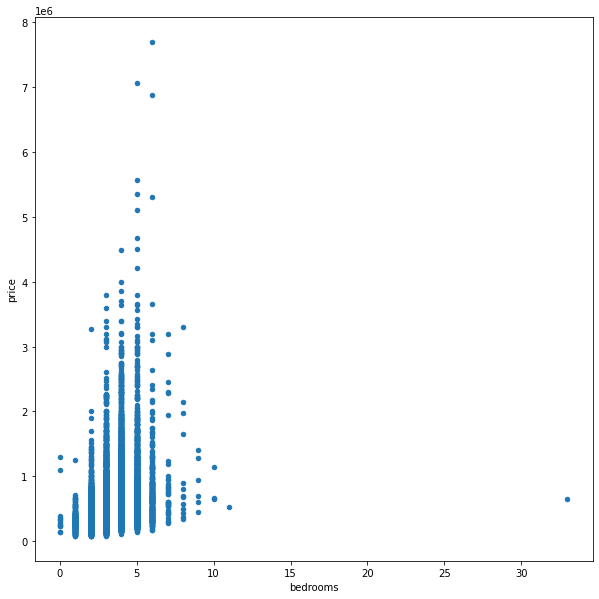

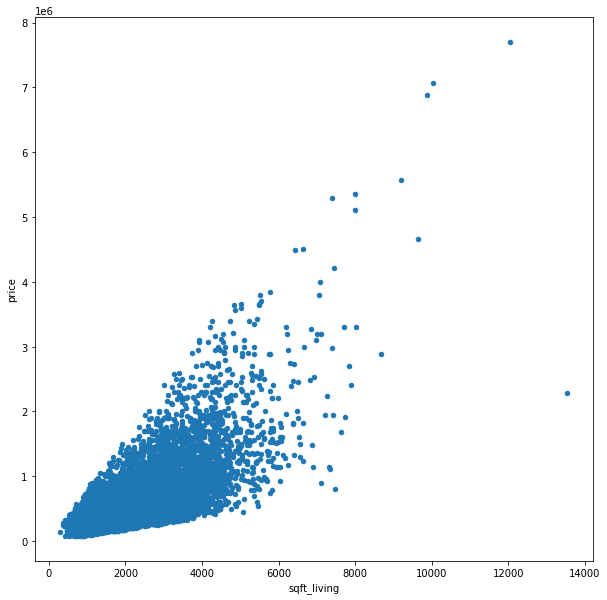

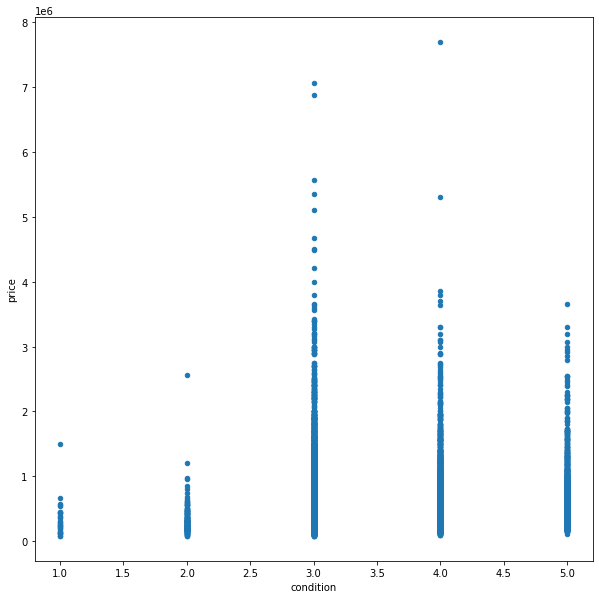

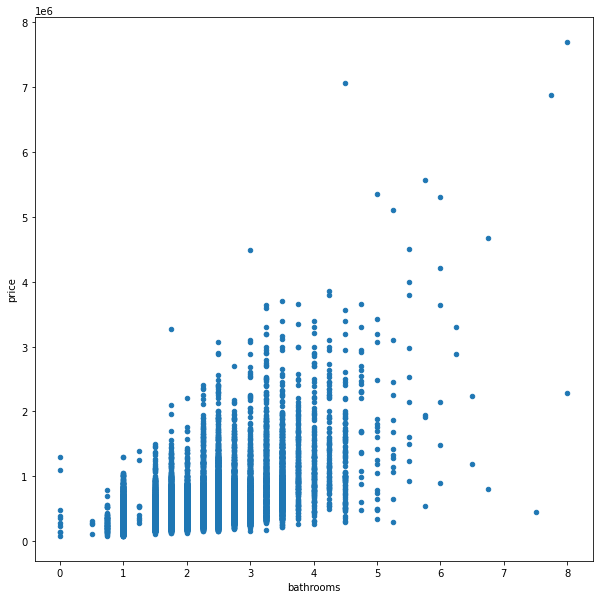

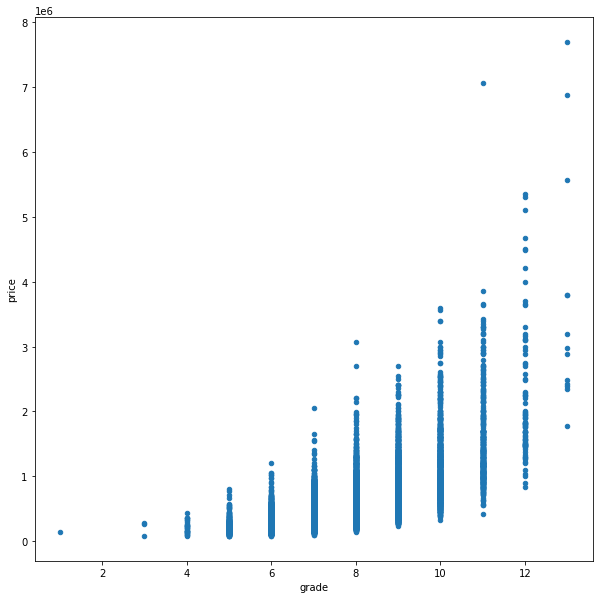

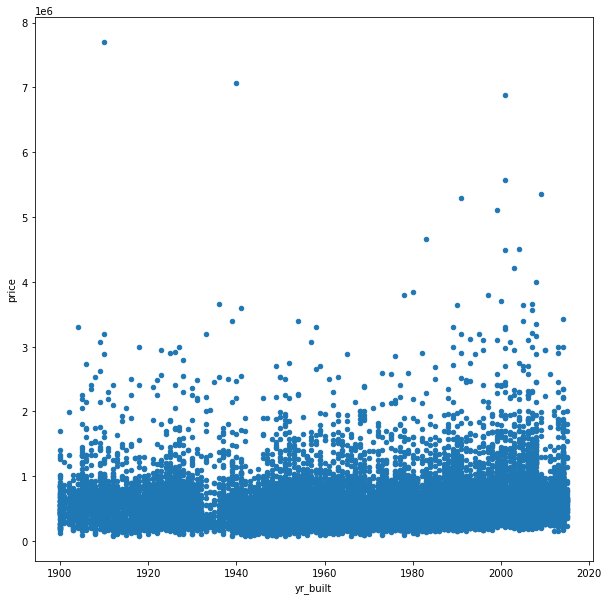

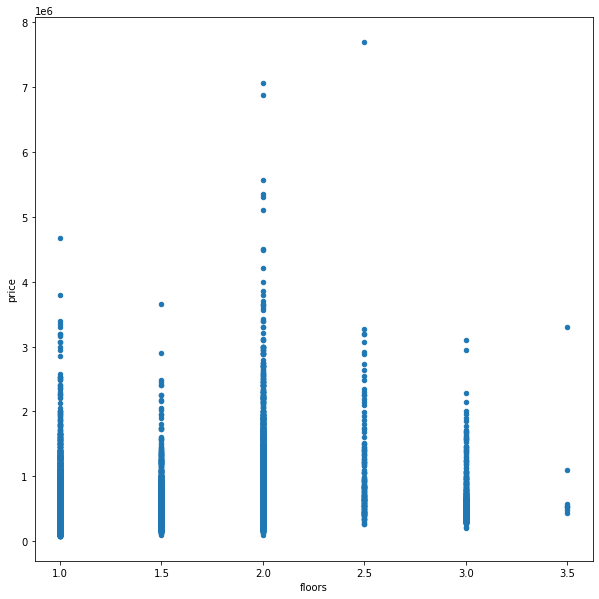

In [ ]:
dados.plot(x='bedrooms', y='price',
        kind="scatter", figsize=(10, 10))

dados.plot(x='sqft_living', y='price',
        kind="scatter", figsize=(10, 10))

dados.plot(x='condition', y='price',
        kind="scatter", figsize=(10, 10))

dados.plot(x='bathrooms', y='price',
        kind="scatter", figsize=(10, 10))

dados.plot(x='grade', y='price',
        kind="scatter", figsize=(10, 10))

dados.plot(x='yr_built', y='price',
        kind="scatter", figsize=(10, 10))

dados.plot(x='floors', y='price',
        kind="scatter", figsize=(10, 10))


plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
previsoes = model.predict(X_test)
previsoes

array([ 732986.5178059 ,  316481.47739081,  922713.89898739, ...,
        377954.56374   , 1440111.59143057,  881330.43960313])

In [ ]:
rmse = np.sqrt(mean_squared_error(previsoes,y_test))
rmse

243988.91492842048

In [ ]:
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': previsoes})
df_temp.head(20)

,Actual,Predicted
0,459000.0,732986.517806
1,445000.0,316481.477391
2,1057000.0,922713.898987
3,732350.0,683951.784338
4,235000.0,341138.711415
5,555000.0,611923.730158
6,365000.0,586655.377497
7,685000.0,830766.863469
8,525000.0,543688.560654
9,449950.0,627650.115664


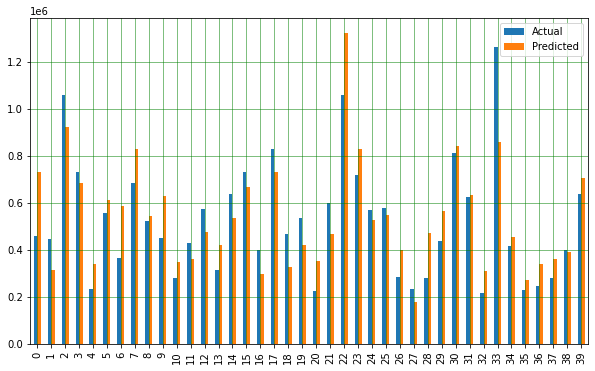

In [ ]:
df_temp = df_temp.head(40)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [ ]:
model.coef_

array([-43536.12215229,    176.26256429,  18211.88234107,  -3940.05015796,
        50155.60899583, 129540.08795656,  26579.30979203])

In [ ]:
## Verificando a previsão em um ponto de dados

X_new = np.array([3,120,5,2020,2,8,12]).reshape(1,-1)
model.predict(X_new)

array([362160.65804493])

In [ ]:
# Salvando modelo, isso irá gerar o arquivo .pkl


joblib.dump(model,"apartment_price_prediction.pkl")

['apartment_price_prediction.pkl']

3)Salvaria  o modelo em um arquivo utilizando o framework flask, para obter os campos do vetor x e prever.

Os aplicativos (móveis/web) devem ser desacoplados do treinamento/teste/ajuste do modelo. As ferramentas de implantação, como o docker, oferecem escalabilidade e facilidade de implantação ao seu aplicativo de aprendizado de máquina. Implaria outros algoritmos de aprendizado de máquina como SVM, KNN, árvore de decisão como aplicativos móveis da web altamente escaláveis.

---

---